# Analyze data

$p_1$ denotes the probability of measuring $XZX$, $p_2$ denotes the probability of applying a random symmetric three qubit Clifford, and $1-p_1-p_2$ is the probability of applying our channel. The data in the `data` folder comes from doing the following:

- Run the simulation to depth 40 (linear architecture). At each depth, compute the two copy string order parameters. Do this `2**nqubits` times. Average the string order parameters at each depth via the `2**nqubits` samples. So this gives us a list of 40 values, where the $i^{\textrm{th}}$ value is an estimate of the average string order parameter expectation value at depth $i$.
- From this list, we get estimates for $|O(t) - O(\infty)|$ for each pair $(p_1, p_2)$.

This is the data stored in the file in the `data` folder. In this notebook, we plot the results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Read data

In [2]:
# num_qubits = range(6, 8, 2)
# lams = 1, 0.99, 0.98
num_qubits = range(6, 21, 2)
lams = (0, 0.05, 1)

(
    purity_data,
    endpoint_data,
    string_S_data,
    string_W_data,
    trivial_string_S_data,
    trivial_string_W_data,
    ZZZZ_data,
) = ({}, {}, {}, {}, {}, {}, {})
for nqubits in num_qubits:
    for lam in lams:
        purity_data[(nqubits, lam)] = []
        endpoint_data[(nqubits, lam)] = []
        string_S_data[(nqubits, lam)] = []
        string_W_data[(nqubits, lam)] = []
        trivial_string_S_data[(nqubits, lam)] = []
        trivial_string_W_data[(nqubits, lam)] = []
        ZZZZ_data[(nqubits, lam)] = []
        with open(f"data/nqubits_{nqubits}_lam_{int(100*lam)}.dat") as f:
            start, purity, endpoints = False, [], []
            for l in f:
                if "#" in l:
                    start = True
                elif l and start:
                    if not purity_data[(nqubits, lam)]:
                        purity_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        endpoint_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        string_S_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        string_W_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        trivial_string_S_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        trivial_string_W_data[(nqubits, lam)] = eval(l)
                    elif not purity_data[(nqubits, lam)]:
                        ZZZZ_data[(nqubits, lam)] = eval(l)

## Plot purity

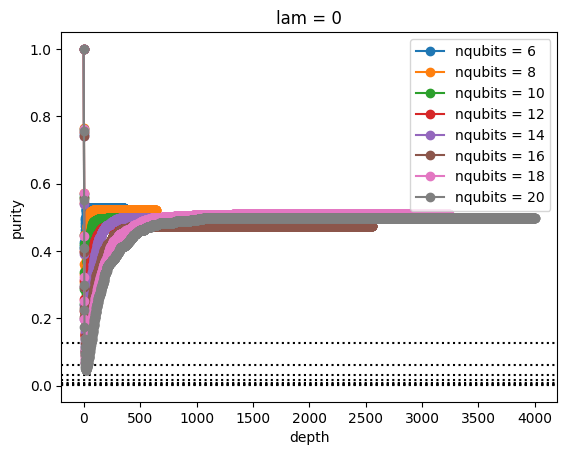

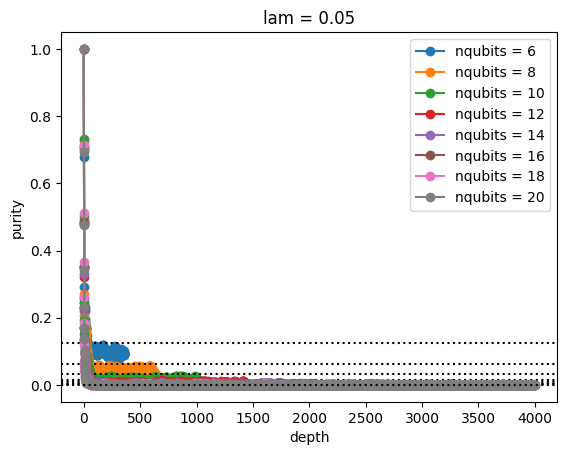

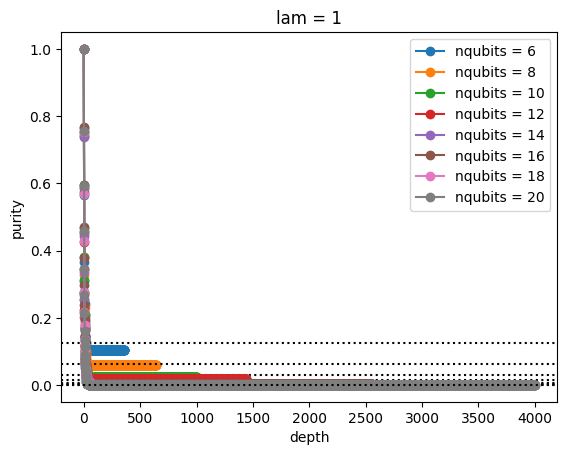

In [3]:
for lam in lams:
    plt.figure()
    for nqubits in num_qubits:
        dat = nqubits, lam
        plt.plot(
            range(len(purity_data[dat])),
            purity_data[dat],
            "o-",
            label=f"nqubits = {nqubits}",
        )
        plt.axhline(2.0 ** (-nqubits / 2.0), linestyle=":", color="k")
    plt.xlabel("depth")
    plt.ylabel("purity")
    plt.title(f"lam = {lam}")
    plt.legend()

plt.show()

## Plot endpoints / purity

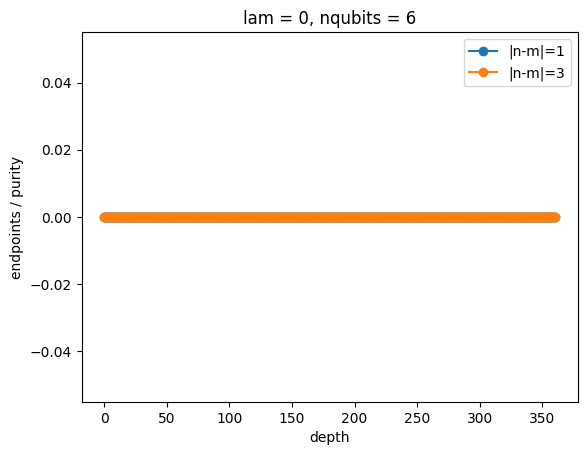

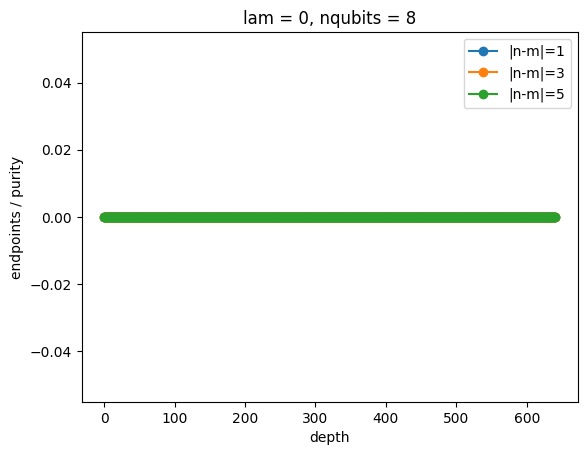

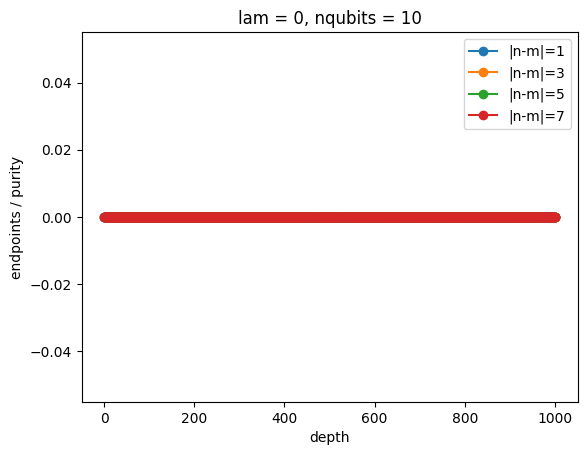

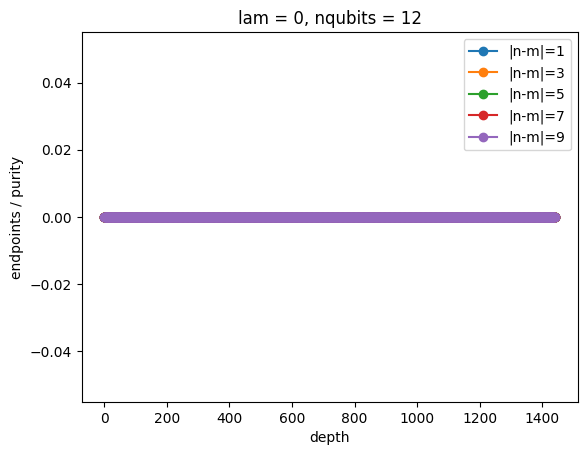

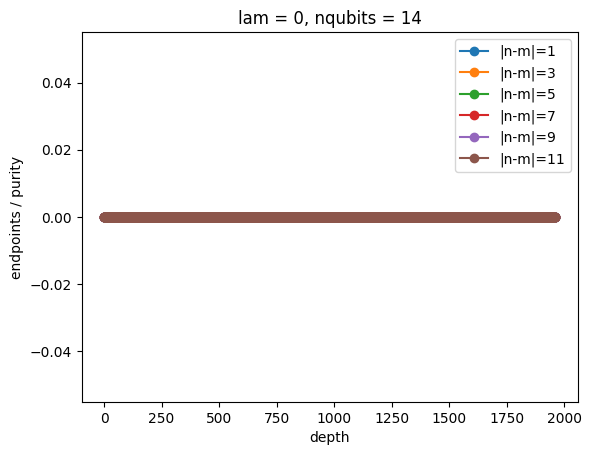

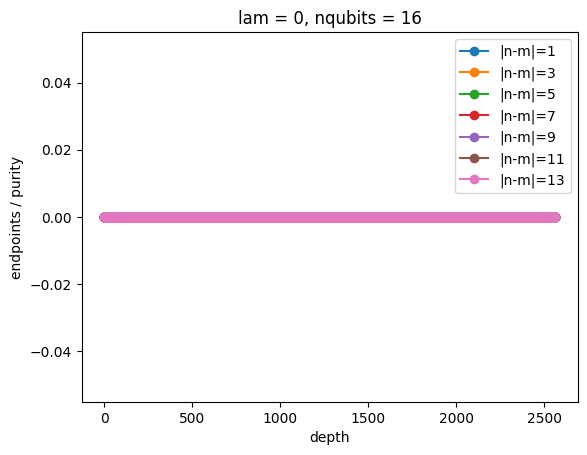

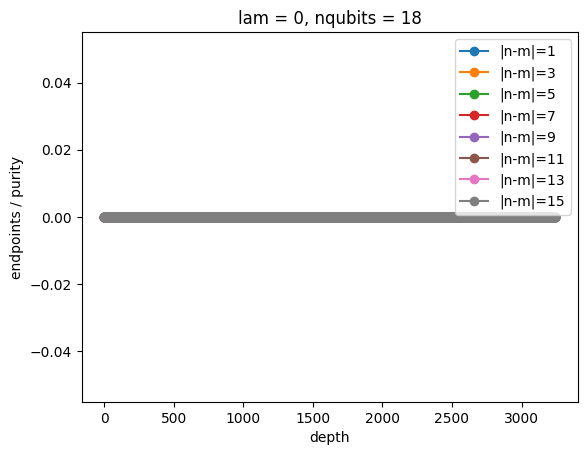

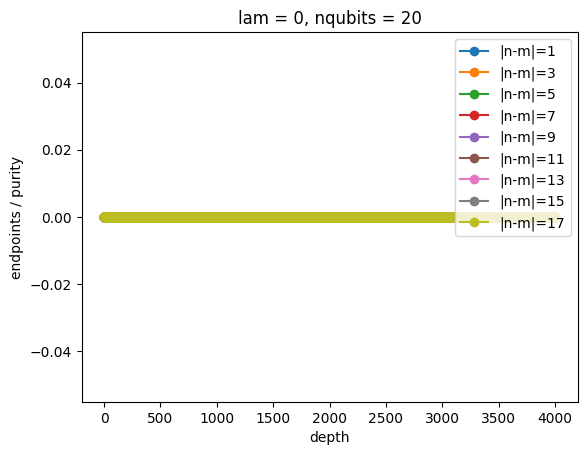

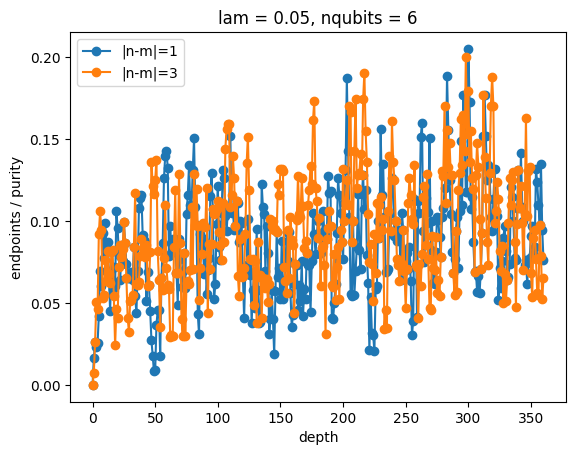

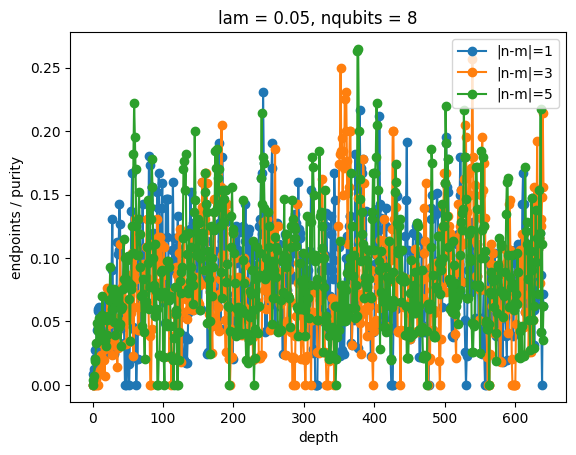

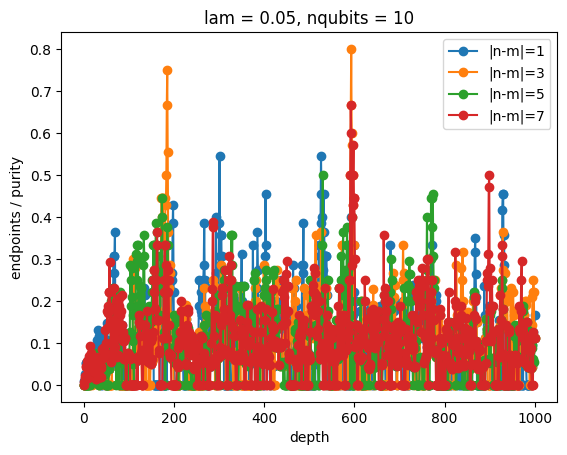

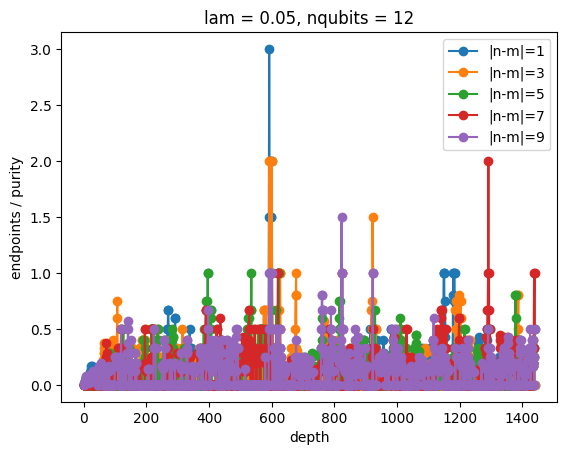

/var/folders/mg/jdz4gjfj4d9bdqjhbr8mv61m0000gn/T/ipykernel_1581/3475582779.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.plot(xs, np.divide(dat[:, y], pdat), "o-", label=f"|n-m|={2*y+1}")
/var/folders/mg/jdz4gjfj4d9bdqjhbr8mv61m0000gn/T/ipykernel_1581/3475582779.py:25: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, np.divide(dat[:, y], pdat), "o-", label=f"|n-m|={2*y+1}")


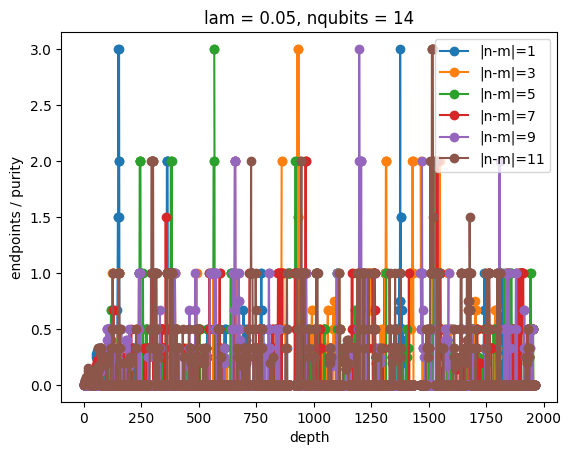

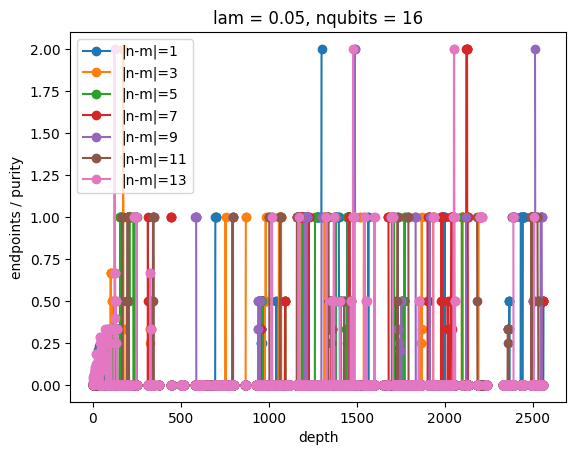

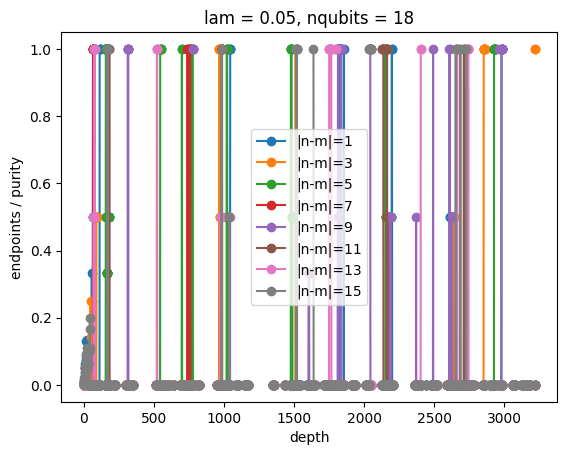

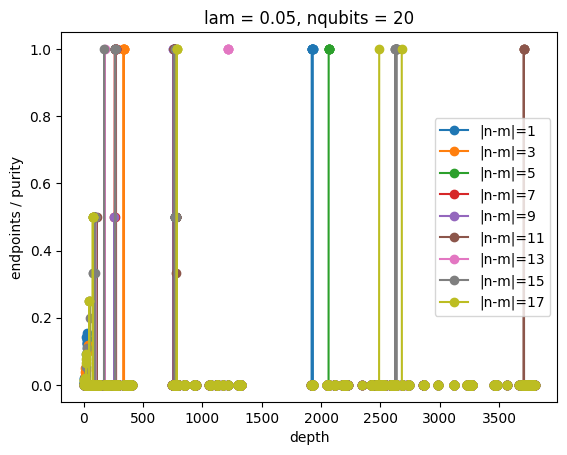

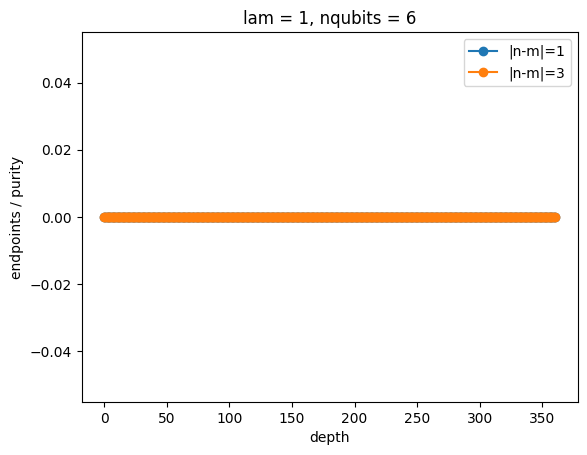

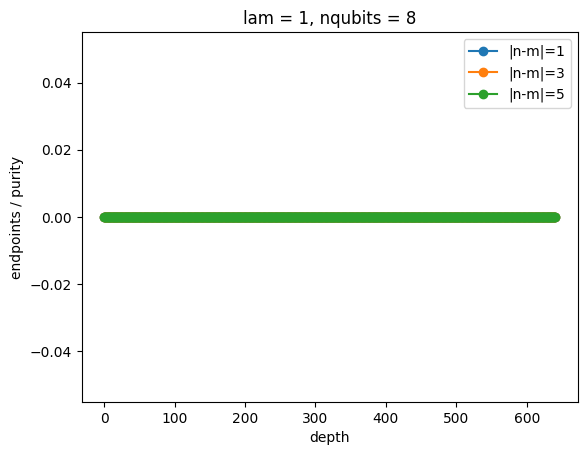

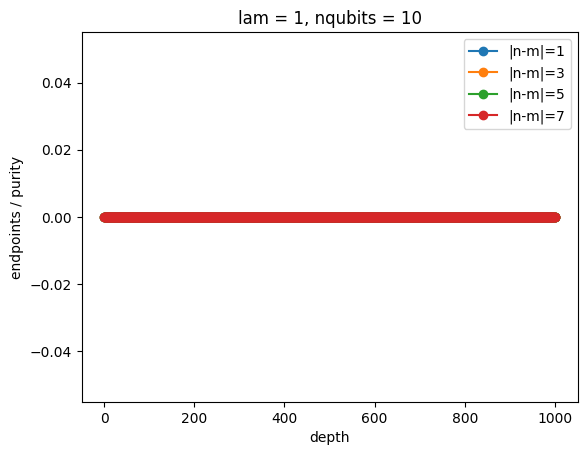

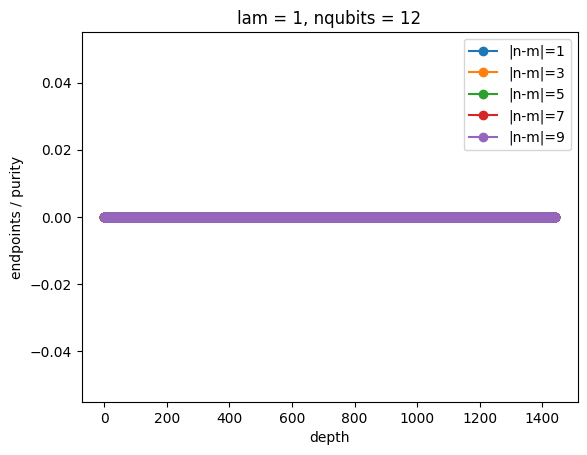

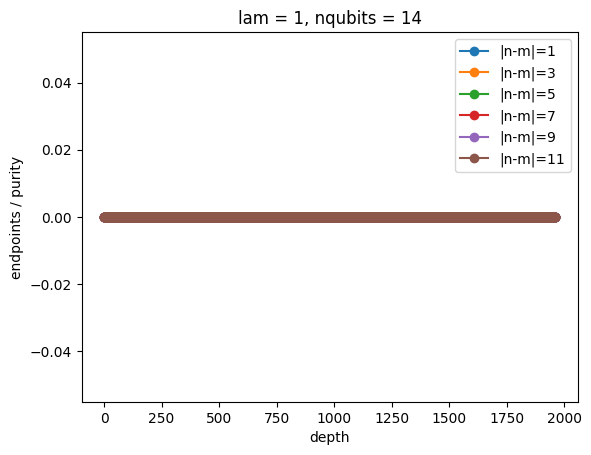

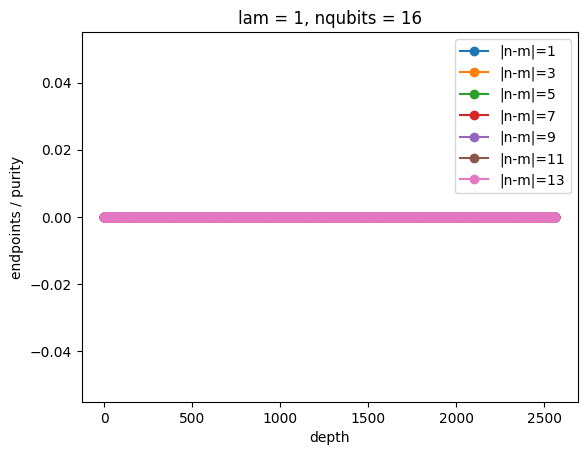

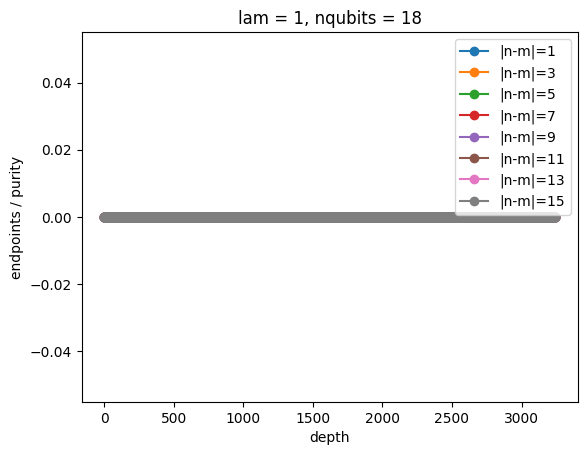

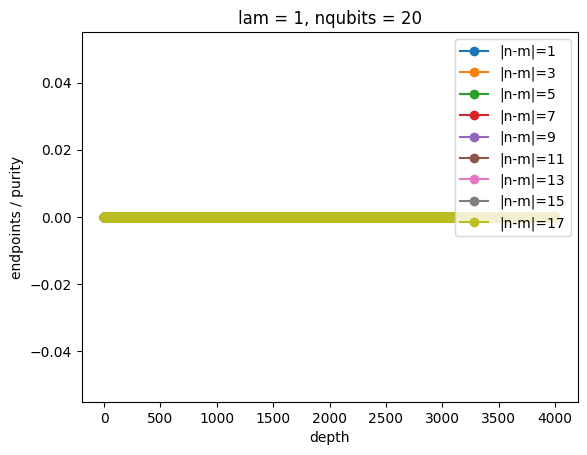

In [4]:
def heatmap(x, y, z, xlabel="", ylabel="", title=""):
    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(y, x)

    fig, ax = plt.subplots()

    c = ax.pcolormesh(x, y, z, cmap="RdBu")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)

    plt.show()


for lam in lams:
    for nqubits in num_qubits:
        plt.figure()
        dat = np.array(endpoint_data[(nqubits, lam)])
        pdat = np.array(purity_data[(nqubits, lam)])
        xs = range(len(pdat))
        ys = range(len(dat[0]))
        for y in ys:
            plt.plot(xs, np.divide(dat[:, y], pdat), "o-", label=f"|n-m|={2*y+1}")
        plt.xlabel("depth")
        plt.ylabel("endpoints / purity")
        plt.title(f"lam = {lam}, nqubits = {nqubits}")
        plt.legend()
        plt.show()

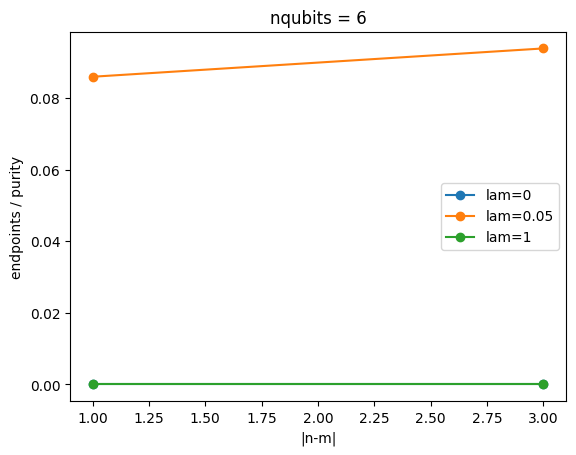

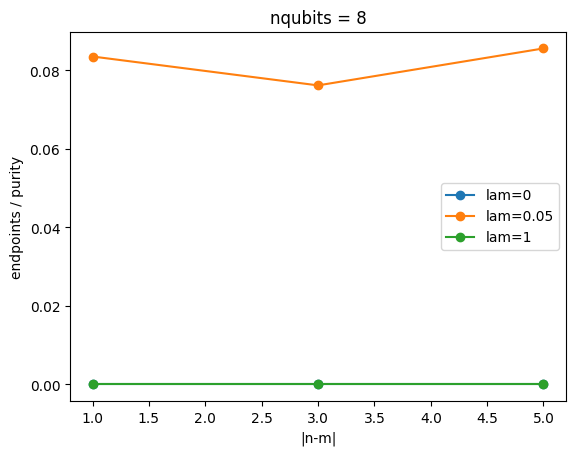

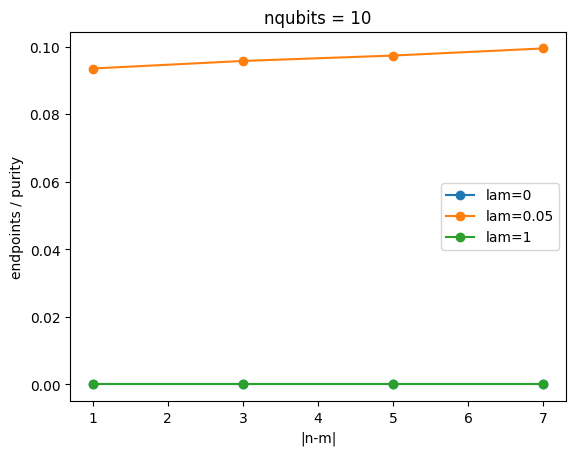

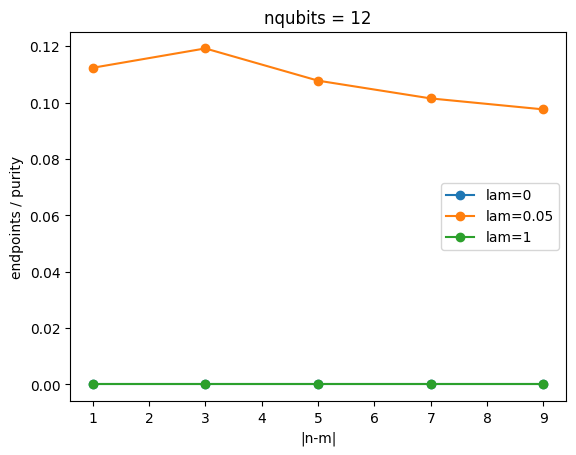

/var/folders/mg/jdz4gjfj4d9bdqjhbr8mv61m0000gn/T/ipykernel_1581/3925831174.py:9: RuntimeWarning: divide by zero encountered in divide
  [np.mean(np.divide(dat[:, x], pdat)[:-10]) for x in range(len(dat[0]))],
/var/folders/mg/jdz4gjfj4d9bdqjhbr8mv61m0000gn/T/ipykernel_1581/3925831174.py:9: RuntimeWarning: invalid value encountered in divide
  [np.mean(np.divide(dat[:, x], pdat)[:-10]) for x in range(len(dat[0]))],


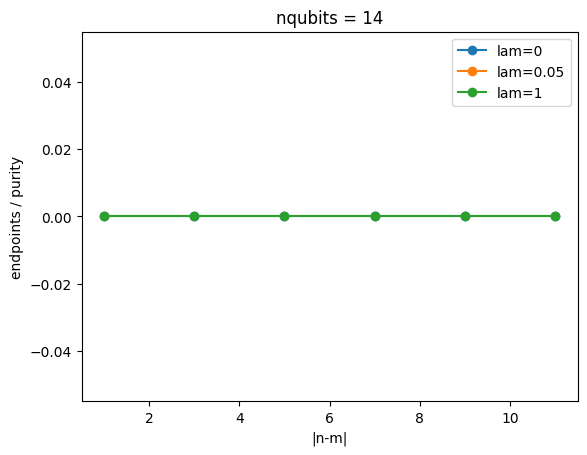

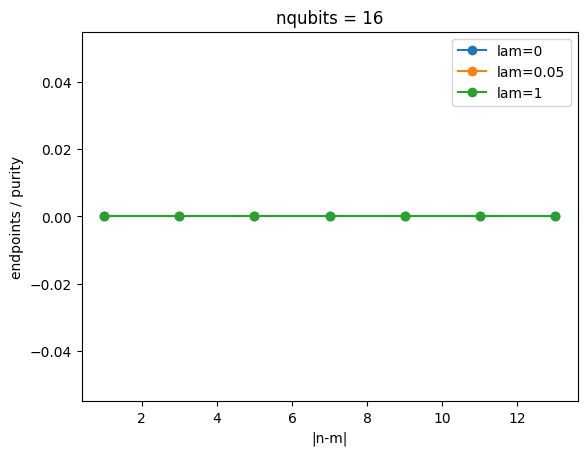

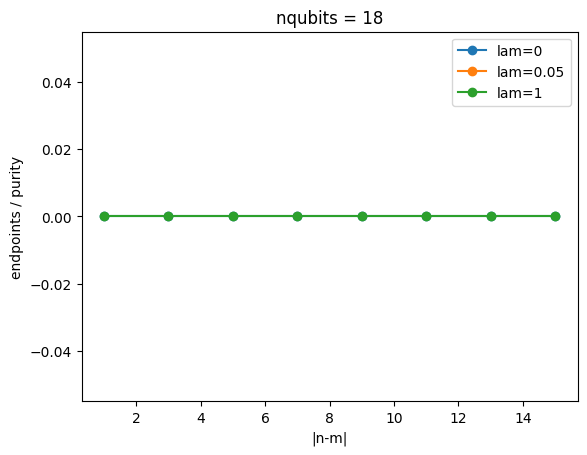

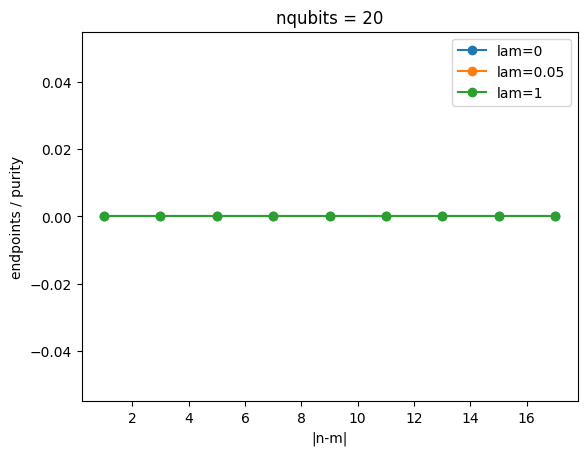

In [5]:
for nqubits in num_qubits:
    plt.figure()
    for lam in lams:
        dat = np.array(endpoint_data[(nqubits, lam)])
        xs = [1 + 2 * x for x in range(len(dat[0]))]
        pdat = np.array(purity_data[(nqubits, lam)])
        plt.plot(
            xs,
            [np.mean(np.divide(dat[:, x], pdat)[:-10]) for x in range(len(dat[0]))],
            "o-",
            label=f"lam={lam}",
        )
    plt.xlabel("|n-m|")
    plt.ylabel("endpoints / purity")
    plt.title(f"nqubits = {nqubits}")
    plt.legend()
    plt.show()

## To do: add the other plots

Data that we have:

            purity,
            endpoints,
            string_S,
            string_W,
            trivial_string_S,
            trivial_string_W,
            ZZZZ,